# Análisis de desórdenes mentales en el mundo.

## Introducción

## Justificación
El presente proyecto busca generar un análisis de la evolución de diversos desórdenes mentales en el mundo a lo largos de las últimas décadas. Para este proyecto se hace especial énfasis en la depresión, ya que se cuenta con una base de información extremadamente bien documentada sobre este fenómeno en particular y, por otro lado, este desorden en particular se encuentra como la mayor causa de discapacidad en el mundo, siendo entonces su estudio y comprensión de suma importancia para un mayor entendimiento de sus causas, consecuencias, así como de sus posibles soluciones.

La OMS ha identificado fuertes vínculos entre la depresión y otros trastornos y enfermedades no transmisibles. La depresión aumenta el riesgo de trastornos por uso de sustancias y enfermedades como la diabetes y las enfermedades del corazón; lo contrario también es cierto, lo que significa que las personas con estas otras condiciones tienen un mayor riesgo de depresión.

La depresión también es un factor de riesgo importante para el suicidio, que reclama cientos de miles de vidas cada año.

Es por esta razón que un análisis que nos permita estudiarla resulta sumamente relevante.

## Preguntas clave
- ¿A qué edad empiezan a manifestarse ciertos desórdenes?
- ¿En qué zonas del mundo hay mayor prevalencia de desórdenes mentales?
- ¿Qué tan prevalentes son estos desórdenes en países de escasos recursos? ¿Y en países de primer mundo?
- ¿Qué tendencia tienen en su prevalencia a lo largo de los años?
- ¿Está relacionada la depresión con el suicidio?
- ¿Qué género tiene mayor riesgo de padecer depresión?
- ¿Cómo se compara la situación de México en comparación al mundo?

## Setup

### Instalación de las librerías

In [0]:
# !pip install openpyxl
# !pip install pandas
# !pip install kaggle
# !pip install zipfile

### Importación de Librerías
- Pandas
- ZipFile
- os

In [0]:
import pandas as pd
from zipfile import ZipFile 
import os

## Desarrollo

### Lectura de datos

In [0]:
global_disorders = pd.read_excel(open("./data/depression.xlsx", 'rb'), sheet_name='prevalence-by-mental-and-substa')
education_level = pd.read_excel(open('data/depression.xlsx', 'rb'), sheet_name='depression-by-level-of-educatio')
age_groups = pd.read_excel(open('data/depression.xlsx', 'rb'), sheet_name='prevalence-of-depression-by-age')
gender_groups = pd.read_excel(open('data/depression.xlsx', 'rb'), sheet_name='prevalence-of-depression-males-')
depression_and_suicide_rate = pd.read_excel(open('data/depression.xlsx', 'rb'), sheet_name='suicide-rates-vs-prevalence-of-')
affected = pd.read_excel(open('data/depression.xlsx', 'rb'), sheet_name='number-with-depression-by-count')

### Visualización las dimensiones de las tablas

La uniformidad de los datos es importante, ya que nos permite concatenar fácilmente datos que están relacionados entre sí.

Esto se realiza mediante la función <code>shape</code>.

In [0]:
print('global disorders: ', global_disorders.shape)
print('education levels', education_level.shape)
print('age groups: ', age_groups.shape)
print('gender groups: ', gender_groups.shape)
print('depression and suicide rate: ', depression_and_suicide_rate.shape)
print('affected: ', affected.shape)

global disorders:  (6468, 10)
education levels (26, 15)
age groups:  (6468, 13)
gender groups:  (47807, 6)
depression and suicide rate:  (47807, 6)
affected:  (6468, 4)


### Nombre y tipos de datos

La consistencia entre los metadatos de un conjunto de datos permite la correcta integración entre sí.

Esto se realiza mediante la función <code>dtypes</code>.

DataFrame de índices de desórdenes globales

In [0]:
global_disorders.dtypes

Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

DataFrame de índices de depresión por nivel de educación

In [0]:
education_level.dtypes

Entity                                                           object
Code                                                             object
Year                                                              int64
All levels (active) (%)                                         float64
All levels (employed) (%)                                       float64
All levels (total) (%)                                          float64
Below upper secondary (active) (%)                              float64
Below upper secondary (employed) (%)                            float64
Below upper secondary (total) (%)                               float64
Tertiary (active) (%)                                           float64
Tertiary (employed) (%)                                         float64
Tertiary (total) (%)                                            float64
Upper secondary & post-secondary non-tertiary (active) (%)      float64
Upper secondary & post-secondary non-tertiary (employed) (%)    

DataFrame de índices de depresión por edad

In [0]:
age_groups.dtypes

Entity                   object
Code                     object
Year                      int64
20-24 years old (%)     float64
10-14 years old (%)     float64
All ages (%)            float64
70+ years old (%)       float64
30-34 years old (%)     float64
15-19 years old (%)     float64
25-29 years old (%)     float64
50-69 years old (%)     float64
Age-standardized (%)    float64
15-49 years old (%)     float64
dtype: object

DataFrame de índices de depresión por género

In [0]:
gender_groups.dtypes

Entity                        object
Code                          object
Year                          object
Prevalence in males (%)      float64
Prevalence in females (%)    float64
Population                   float64
dtype: object

DataFrame de índices de depresión y suicidio por cada 100,000 individuos

In [0]:
depression_and_suicide_rate.dtypes

Entity                                                       object
Code                                                         object
Year                                                         object
Suicide rate (deaths per 100,000 individuals)               float64
Depressive disorder rates (number suffering per 100,000)    float64
Population                                                  float64
dtype: object

DataFrame de población afectada por la depresión

In [0]:
affected.dtypes

Entity                                                                                                        object
Code                                                                                                          object
Year                                                                                                           int64
Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)    float64
dtype: object

### Visualización de un conjunto de datos pequeño

Explorar el conjunto de datos nos permite visualizar los posibles valores que adquiere cada columna y de esta forma, realizar un correcto procesamiento de datos.

Este proceso se realiza mediante la función <code>head</code>.

DataFrame de índices de desórdenes globales

In [0]:
round(global_disorders.head(), 3)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.161,0.698,0.102,4.829,1.677,4.072,0.672
1,Afghanistan,AFG,1991,0.160,0.698,0.099,4.830,1.685,4.080,0.672
2,Afghanistan,AFG,1992,0.160,0.698,0.097,4.831,1.694,4.088,0.671
3,Afghanistan,AFG,1993,0.160,0.698,0.094,4.831,1.705,4.096,0.670
4,Afghanistan,AFG,1994,0.160,0.698,0.092,4.829,1.716,4.100,0.669


DataFrame de índices de depresión por nivel de educación

In [0]:
education_level.head()

,Entity,Code,Year,All levels (active) (%),All levels (employed) (%),All levels (total) (%),Below upper secondary (active) (%),Below upper secondary (employed) (%),Below upper secondary (total) (%),Tertiary (active) (%),Tertiary (employed) (%),Tertiary (total) (%),Upper secondary & post-secondary non-tertiary (active) (%),Upper secondary & post-secondary non-tertiary (employed) (%),Upper secondary & post-secondary non-tertiary (total) (%)
0,Austria,AUT,2014,6.5,4.7,7.7,15.5,9.0,15.2,4.3,3.5,5.5,5.5,4.2,6.7
1,Belgium,BEL,2014,5.0,4.1,7.1,7.1,4.8,11.6,3.7,3.3,4.2,5.7,5.0,7.5
2,Czech Republic,CZE,2014,3.0,2.6,4.0,2.1,2.5,6.0,1.7,1.7,2.0,3.5,3.0,4.4
3,Denmark,DNK,2014,6.7,5.7,8.3,10.4,6.5,15.5,5.7,4.7,6.7,7.4,6.9,8.8
4,Estonia,EST,2014,3.8,3.8,5.1,4.7,4.7,6.4,3.6,3.6,4.3,3.7,3.8,5.2


DataFrame de índices de depresión por edad

In [0]:
round(age_groups.head(), 3)

,Entity,Code,Year,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,4.418,1.595,3.219,5.203,5.799,3.456,5.176,5.918,4.072,4.940
1,Afghanistan,AFG,1991,4.434,1.588,3.203,5.193,5.815,3.452,5.177,5.927,4.080,4.903
2,Afghanistan,AFG,1992,4.454,1.578,3.157,5.177,5.830,3.435,5.160,5.946,4.088,4.837
3,Afghanistan,AFG,1993,4.465,1.577,3.121,5.167,5.853,3.420,5.149,5.967,4.096,4.814
4,Afghanistan,AFG,1994,4.463,1.571,3.082,5.158,5.853,3.425,5.148,5.976,4.100,4.839


DataFrame de índices de depresión por género

In [0]:
gender_groups.head()

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0


DataFrame de índices de depresión y suicidio por cada 100,000 individuos

In [0]:
depression_and_suicide_rate.head()

,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0


DataFrame de población afectada por la depresión

In [0]:
round(affected.head(), 3)

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,AFG,1990,318435.814
1,Afghanistan,AFG,1991,329044.774
2,Afghanistan,AFG,1992,382544.573
3,Afghanistan,AFG,1993,440381.507
4,Afghanistan,AFG,1994,456916.645


La tabla <code>education_level</code> carece de la información necesaria para poder relacionarla con los demás DataFrames, por lo que decidimos descartarla debido a múltiples factores como:

- Únicamente comprende el año 2014.
- Contiene muy pocos registros, por lo que altera la uniformidad de los datos.
- Comprende países de una sola región.

### Renombramiento

Como pudimos observar, los nombres de las columnas no siguen la convención de nombramiento de variables <code>Snake Case</code>, por lo que hay que renombrar cada columna para cada una de los DataFrames mediante la función <code>rename</code>.

In [0]:
percentages_of_global_disorders = global_disorders.copy().rename(
    columns={
        'Entity': 'entity',
        'Code': 'code',
        'Year': 'year',
        'Schizophrenia (%)': 'schizophrenia',
        'Bipolar disorder (%)': 'bipolar_disorder',
        'Eating disorders (%)': 'eating_disorder',
        'Anxiety disorders (%)': 'anxiety',
        'Drug use disorders (%)': 'drug_addiction',
        'Depression (%)': 'depression',
        'Alcohol use disorders (%)': 'alcoholism'
    }
)

depression_rates_by_age = age_groups.copy().rename(
    columns={
        'Entity': 'entity',
        'Code': 'code',
        'Year': 'year',
        'All ages (%)': 'all',
        '10-14 years old (%)': 'from_10_to_14',
        '15-19 years old (%)': 'from_15_to_19',
        '20-24 years old (%)': 'from_20_to_24',
        '25-29 years old (%)': 'from_25_to_29',
        '30-34 years old (%)': 'from_30_to_34',
        '15-49 years old (%)': 'from_15_to_49',
        '50-69 years old (%)': 'from_50_to_69',
        '70+ years old (%)': 'above_69',
        'Age-standardized (%)': 'standardized'
    }
)

depression_rates_by_gender = gender_groups.copy().rename(
    columns = {
        'Entity': 'entity',
        'Code': 'code',
        'Year': 'year',
        'Prevalence in males (%)': 'prevalence_in_males',
        'Prevalence in females (%)': 'prevalence_in_females',
        'Population': 'population'
    }
)

depression_and_suicide_rate_per_100000_individuals = depression_and_suicide_rate.copy().rename(
    columns={
        'Entity': 'entity',
        'Code': 'code',
        'Year': 'year',
        'Suicide rate (deaths per 100,000 individuals)': 'suicide_rate',
        'Depressive disorder rates (number suffering per 100,000)': 'depression_rate',
        'Population': 'population'
    }
)

depression_affected = affected.copy().rename(
    columns={
        'Entity': 'entity',
        'Code': 'code',
        'Year': 'year',
        'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)': 'depression_prevalence'
    }
)

### Casting

La columna <code>year</code> de los DataFrames <code>gender_groups</code> y <code>depression_and_suicide_rate</code> es de tipo <code>object</code> mientras que en los demás DataFrames es de tipo <code>int64</code>.

1. Transformar los valores a números mediante la función <code>to_numeric</code>.
2. Filtrar los registros que no tienen valores <code>NaN</code> mediante la función <code>isna</code>.
3. Transformar los valores de <code>float64</code> a <code>int64</code> mediante la función <code>astype</code>.

In [0]:
depression_rates_by_gender['year'] = pd.to_numeric(depression_rates_by_gender['year'], errors='coerce')
depression_rates_by_gender = depression_rates_by_gender[depression_rates_by_gender['year'].isna() == False]
depression_rates_by_gender['year'] = depression_rates_by_gender['year'].astype('int64')

depression_and_suicide_rate_per_100000_individuals['year'] = pd.to_numeric(depression_and_suicide_rate_per_100000_individuals['year'], errors='coerce')
depression_and_suicide_rate_per_100000_individuals = depression_and_suicide_rate_per_100000_individuals[depression_and_suicide_rate_per_100000_individuals['year'].isna() == False]
depression_and_suicide_rate_per_100000_individuals['year'] = depression_and_suicide_rate_per_100000_individuals['year'].astype('int64')

### Limpieza de datos

Es necesario identificar las columnas que poseen valores <code>NaN</code>, ya que los datos <code>NaN</code> no permiten un correcto procesamiento de los datos.

Este proceso se realiza mediante las funciones <code>isna</code> y <code>mean</code>.

DataFrame de índices de desórdenes globales

In [0]:
percentages_of_global_disorders.isna().mean()

entity              0.000000
code                0.151515
year                0.000000
schizophrenia       0.000000
bipolar_disorder    0.000000
eating_disorder     0.000000
anxiety             0.000000
drug_addiction      0.000000
depression          0.000000
alcoholism          0.000000
dtype: float64

DataFrame de índices de depresión por edad

In [0]:
depression_rates_by_age.isna().mean()

entity           0.000000
code             0.151515
year             0.000000
from_20_to_24    0.000000
from_10_to_14    0.000000
all              0.000000
above_69         0.000000
from_30_to_34    0.000000
from_15_to_19    0.000000
from_25_to_29    0.000000
from_50_to_69    0.000000
standardized     0.000000
from_15_to_49    0.000000
dtype: float64

DataFrame de índices de depresión por género

In [0]:
depression_rates_by_gender.isna().mean()

entity                   0.000000
code                     0.034900
year                     0.000000
prevalence_in_males      0.864508
prevalence_in_females    0.864508
population               0.019356
dtype: float64

DataFrame de índices de depresión y suicidio por cada 100,000 individuos

In [0]:
depression_and_suicide_rate_per_100000_individuals.isna().mean()

entity             0.000000
code               0.034900
year               0.000000
suicide_rate       0.864508
depression_rate    0.864508
population         0.019356
dtype: float64

DataFrame de población afectada por la depresión

In [0]:
depression_affected.isna().mean()

entity                   0.000000
code                     0.151515
year                     0.000000
depression_prevalence    0.000000
dtype: float64

Los DataFrames contienen regiones del mundo. Estas solo nos proporcionan información parcial, por lo que no son de gran utilidad para este análisis.

Todos estos registros pueden filtrarse mediante la función <code>isna</code> aplicada a la columna <code>code</code>, ya que esta columna no tiene valor alguno para estos registros.

In [0]:
percentages_of_global_disorders = percentages_of_global_disorders.drop(percentages_of_global_disorders[percentages_of_global_disorders['code'].isna()].index)

depression_rates_by_age = depression_rates_by_age.drop(depression_rates_by_age[depression_rates_by_age['code'].isna()].index)

depression_rates_by_gender = depression_rates_by_gender.drop(depression_rates_by_gender[depression_rates_by_gender['code'].isna()].index)

depression_and_suicide_rate_per_100000_individuals = depression_and_suicide_rate_per_100000_individuals.drop(depression_and_suicide_rate_per_100000_individuals[depression_and_suicide_rate_per_100000_individuals['code'].isna()].index)

depression_affected = depression_affected.drop(depression_affected[depression_affected['code'].isna()].index)

Existen registros donde la columna <code>code</code> no tiene valor alguno por el momento, por lo que se puede eliminar sin dañar la integridad de los datos.

Los valores únicos de las columnas <code>entity</code> y <code>code</code> se almacenan en una lista para hacer referencia a este valor más adelante.

Este proceso se realiza mediante la función <code>drop</code>.

In [0]:
three_letter_code = pd.Series(data = depression_rates_by_age['code'].unique(),index= depression_rates_by_age['entity'].unique(), name = "code")

percentages_of_global_disorders = percentages_of_global_disorders.drop(columns=['code'])
depression_rates_by_age = depression_rates_by_age.drop(columns=['code'])
depression_rates_by_gender = depression_rates_by_gender.drop(columns=['code'])
depression_and_suicide_rate_per_100000_individuals = depression_and_suicide_rate_per_100000_individuals.drop(columns=['code'])
depression_affected = depression_affected.drop(columns=['code'])

Ahora, procedemos a filtrar los registros comprendidos entre los años <code>1990</code> y <code>2017</code> de los DataFrames <code>depression_rates_by_gender</code> y <code>depression_and_suicide_rate_per_100000_individuals</code>.

In [0]:
depression_rates_by_gender = depression_rates_by_gender[(depression_rates_by_gender['year'] >= 1990) & (depression_rates_by_gender['year'] <= 2017)]
depression_and_suicide_rate_per_100000_individuals = depression_and_suicide_rate_per_100000_individuals[(depression_and_suicide_rate_per_100000_individuals['year'] >= 1990) & (depression_and_suicide_rate_per_100000_individuals['year'] <= 2017)]

Aplicamos la función <code>shape</code> para visualizar el tamaño actual de los DataFrames.

In [0]:
print('percentages of global disorders: ', percentages_of_global_disorders.shape)
print('depression rates by age: ', depression_rates_by_age.shape)
print('depression rates by gender: ', depression_rates_by_gender.shape)
print('depression and suicide rate per 100,000 individuals: ', depression_and_suicide_rate_per_100000_individuals.shape)
print('depression affected: ', depression_affected.shape)

percentages of global disorders:  (5488, 9)
depression rates by age:  (5488, 12)
depression rates by gender:  (6580, 5)
depression and suicide rate per 100,000 individuals:  (6580, 5)
depression affected:  (5488, 3)


Como podemos observar, los DataFrames <code>depression_rates_by_gender</code> y <code>depression_and_suicide_rate_per_100000_individuals</code> aún cuentan con una mayor cantidad de registros que el resto de los DataFrames.

Realizamos una comparación entre los valores únicos de las columnas <code>entity</code> de ambos DataFrames y un DataFrame que contiene los valores únicos compartidos de las columnas <code>entity</code> de las demás DataFrame, con el fin de conocer las entidades adicionales tienen ambos DataFrames.

In [0]:
gender_groups_unique_list = pd.Series(pd.unique(depression_rates_by_gender['entity']))

countries_not_in_all_dfs = gender_groups_unique_list[gender_groups_unique_list.apply(lambda x:x not in pd.unique(percentages_of_global_disorders['entity']))]
countries_not_in_all_dfs.head()

6                            Anguilla
10                              Aruba
25    Bonaire Sint Eustatius and Saba
29             British Virgin Islands
38                     Cayman Islands
dtype: object

Podemos observar que hay registros de países pequeños, territorios y demás dependencias.

La importancia de estos registros es menor al considerar el valor de uniformidad entre cada uno de los DataFrames obtenidos, por lo que podemos filtrarlos mediante la función <code>apply</code> aplicada a la columna <code>entity</code> de ambos DataFrames.

In [0]:
depression_rates_by_gender = depression_rates_by_gender[depression_rates_by_gender['entity'].apply(lambda x:x not in countries_not_in_all_dfs.tolist())]
depression_and_suicide_rate_per_100000_individuals = depression_and_suicide_rate_per_100000_individuals[depression_and_suicide_rate_per_100000_individuals['entity'].apply(lambda x:x not in countries_not_in_all_dfs.tolist())]

print('depression rates by gender: ', depression_rates_by_gender.shape)
print('depression and suicide rate per 100,000 individuals: ', depression_and_suicide_rate_per_100000_individuals.shape)

depression rates by gender:  (5488, 5)
depression and suicide rate per 100,000 individuals:  (5488, 5)


Una vez que el número de filas sea uniforme, procedemos a comprobar que ya no existan valores <code>NaN</code> en ninguno de los DataFrames.

Este proceso se realiza mediante las funciones <code>isna</code> y <code>mean</code>.

DataFrame de índices de desórdenes globales

In [0]:
percentages_of_global_disorders.isna().mean()

entity              0.0
year                0.0
schizophrenia       0.0
bipolar_disorder    0.0
eating_disorder     0.0
anxiety             0.0
drug_addiction      0.0
depression          0.0
alcoholism          0.0
dtype: float64

DataFrame de índices de desórdenes globales

In [0]:
depression_rates_by_age.isna().mean()

entity           0.0
year             0.0
from_20_to_24    0.0
from_10_to_14    0.0
all              0.0
above_69         0.0
from_30_to_34    0.0
from_15_to_19    0.0
from_25_to_29    0.0
from_50_to_69    0.0
standardized     0.0
from_15_to_49    0.0
dtype: float64

DataFrame de índices de depresión por género

In [0]:
depression_rates_by_gender.isna().mean()

entity                   0.0
year                     0.0
prevalence_in_males      0.0
prevalence_in_females    0.0
population               0.0
dtype: float64

DataFrame de índices de depresión y suicidio por cada 100,000 individuos

In [0]:
depression_and_suicide_rate_per_100000_individuals.isna().mean()

entity             0.0
year               0.0
suicide_rate       0.0
depression_rate    0.0
population         0.0
dtype: float64

DataFrame de población afectada por la depresión

In [0]:
depression_affected.isna().mean()

entity                   0.0
year                     0.0
depression_prevalence    0.0
dtype: float64

### Concatenación de los DataFrames

Una vez que el conjunto de datos está limpio y uniforme, procedemos a concatenar las columnas de los DataFrames.

Este proceso se realiza mediante la función <code>merge</code>, en el análisis hecho previamente se aprecia que todos los DataFrames tienen en común las columnas <code>entity</code> y <code>year</code>, por lo que son adecuadas para relacionar los DataFrames entre sí.

In [0]:
first_merge = percentages_of_global_disorders.merge(depression_rates_by_age, left_on=['entity','year'],right_on=['entity','year'])
second_merge = first_merge.merge(depression_rates_by_gender, left_on=['entity','year'], right_on=['entity','year'])
third_merge = second_merge.merge(depression_and_suicide_rate_per_100000_individuals, left_on=['entity','year'],right_on=['entity','year'])
df_merge = third_merge.merge(depression_affected, left_on=['entity','year'],right_on=['entity','year'])
df_merge.columns

Index(['entity', 'year', 'schizophrenia', 'bipolar_disorder',
       'eating_disorder', 'anxiety', 'drug_addiction', 'depression',
       'alcoholism', 'from_20_to_24', 'from_10_to_14', 'all', 'above_69',
       'from_30_to_34', 'from_15_to_19', 'from_25_to_29', 'from_50_to_69',
       'standardized', 'from_15_to_49', 'prevalence_in_males',
       'prevalence_in_females', 'population_x', 'suicide_rate',
       'depression_rate', 'population_y', 'depression_prevalence'],
      dtype='object')

Como podemos observar, las columnas <code>population_x</code> y <code>population_y</code> hacen referencia a la misma columna, este duplicado se debe a que la columna <code>population</code> estaba presente en dos DataFrames, por lo que es necesario eliminar cualquiera de las dos columnas mediante la función <code>drop</code> para evitar la redundancia de datos y renombrar la otra columna mediante la función <code>rename</code> con el fin de preservar la legibilidad de las variables.

In [0]:
df_merge = df_merge.drop(columns = ['population_y']).rename(columns={'population_x': 'population'})

Procedemos a visualizar el conjunto de datos para comprobar que el proceso se haya llevado a cabo exitosamente.

In [0]:
round(df_merge.head(), 3)

,entity,year,schizophrenia,bipolar_disorder,eating_disorder,anxiety,drug_addiction,depression,alcoholism,from_20_to_24,from_10_to_14,all,above_69,from_30_to_34,from_15_to_19,from_25_to_29,from_50_to_69,standardized,from_15_to_49,prevalence_in_males,prevalence_in_females,population,suicide_rate,depression_rate,depression_prevalence
0,Afghanistan,1990,0.161,0.698,0.102,4.829,1.677,4.072,0.672,4.418,1.595,3.219,5.203,5.799,3.456,5.176,5.918,4.072,4.940,3.500,4.648,12412000.0,10.319,4039.756,318435.814
1,Afghanistan,1991,0.160,0.698,0.099,4.830,1.685,4.080,0.672,4.434,1.588,3.203,5.193,5.815,3.452,5.177,5.927,4.080,4.903,3.504,4.656,13299000.0,10.327,4046.256,329044.774
2,Afghanistan,1992,0.160,0.698,0.097,4.831,1.694,4.088,0.671,4.454,1.578,3.157,5.177,5.830,3.435,5.160,5.946,4.088,4.837,3.509,4.662,14486000.0,10.271,4053.710,382544.573
3,Afghanistan,1993,0.160,0.698,0.094,4.831,1.705,4.096,0.670,4.465,1.577,3.121,5.167,5.853,3.420,5.149,5.967,4.096,4.814,3.513,4.669,15817000.0,10.376,4060.203,440381.507
4,Afghanistan,1994,0.160,0.698,0.092,4.829,1.716,4.100,0.669,4.463,1.571,3.082,5.158,5.853,3.425,5.148,5.976,4.100,4.839,3.516,4.673,17076000.0,10.576,4062.290,456916.645


### API de Kaggle

Para aplicar funciones de agrupación sobre los DataFrames, utilizamos un conjunto de datos alojado en la plataforma Kaggle, el cual contiene los continentes y regiones de los distintos países del mundo.

Esto nos permite agrupar los datos por regiones geográficas y de esta forma, descubrir nuevos hallazgos.

In [0]:
os.environ['KAGGLE_CONFIG_DIR'] = "./data"
!kaggle datasets download -d andradaolteanu/country-mapping-iso-continent-region

file_name = "country-mapping-iso-continent-region.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip_file:
    # printing all the contents of the zip file 
    zip_file.printdir()
    # extracting all the files 
    zip_file.extractall()

!cp "country-mapping-iso-continent-region.zip" "./data/country-mapping-iso-continent-region.zip"
!cp "continents2.csv" "./data/continents2.csv"
!rm "continents2.csv"
!rm "country-mapping-iso-continent-region.zip"

continents = pd.read_csv('./data/continents2.csv')
continents.head()

  0%|                                               | 0.00/4.96k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.96k/4.96k [00:00<00:00, 5.99MB/s]
File Name                                             Modified             Size
continents2.csv                                2019-12-15 15:07:36        19700


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Una vez realizada la descarga y lectura del conjunto de datos obtenido a través de la API de Kaggle, procedemos a realizar la integración con el conjunto de datos principal.

Este proceso se realiza mediante la función <code>merge</code> y de igual forma que lo realizamos anteriormente, empleamos la columna <code>code</code> del DataFrame y la columna <code>alpha-3</code> del conjunto de datos obtenido a través de la API de Kaggle.

In [0]:
df_merge_with_codes = df_merge.merge(three_letter_code, left_on = 'entity', right_index = True)

depression = df_merge_with_codes.merge(continents[['region','sub-region','alpha-3']], left_on='code', right_on= 'alpha-3').drop(columns = ['code','alpha-3'])

Visualizamos las dimensiones del DataFrame

In [0]:
print(f'depression: {depression.shape}')

depression: (5460, 27)


Comprobamos que el proceso no haya generado valores <code>NaN</code>.

In [0]:
depression.isna().mean()

entity                   0.0
year                     0.0
schizophrenia            0.0
bipolar_disorder         0.0
eating_disorder          0.0
anxiety                  0.0
drug_addiction           0.0
depression               0.0
alcoholism               0.0
from_20_to_24            0.0
from_10_to_14            0.0
all                      0.0
above_69                 0.0
from_30_to_34            0.0
from_15_to_19            0.0
from_25_to_29            0.0
from_50_to_69            0.0
standardized             0.0
from_15_to_49            0.0
prevalence_in_males      0.0
prevalence_in_females    0.0
population               0.0
suicide_rate             0.0
depression_rate          0.0
depression_prevalence    0.0
region                   0.0
sub-region               0.0
dtype: float64

Como podemos observar, hemos perdido 28 filas, lo cual equivale a un periodo de 28 años para un país.

Al analizar la diferencia entre la columna <code>code</code> de nuestro DataFrame y la columna <code>alpha-3</code> del conjunto de datos obtenido de Kaggle, podemos observar que existen índices globales que no están presentes dentro del conjunto de datos <code>country-mapping-iso-continent-region</code>.

Dejar este valor a un lado para el análisis de países es aceptable y puede ser calculado de nuevo si se necesita.

In [0]:
three_letter_code[three_letter_code.apply(lambda x: x not in continents['alpha-3'].tolist())]

World    OWID_WRL
Name: code, dtype: object

### Almacenamiento del conjunto de datos procesado

Una vez que hemos realizado la limpieza de datos y aplicado la función <code>merge</code> a los DataFrames, procedemos a guardar dos versiones de la información.

- Conjunto de datos procesado previamente en formato <code>.csv</code>.

- Conjunto de datos procesado previamente con múltiples pestañas en formato <code>.xlsx</code>.

El segundo archivo tiene la finalidad de ofrecer un formato más amigable para realizar un análisis exploratorio rápido de forma manual utilizando software ofimático como Excel.

In [0]:
depression.to_csv('./clean_data/depression_clean.csv', index = False)

with pd.ExcelWriter('./clean_data/depression_clean.xlsx') as writer:
    percentages_of_global_disorders.to_excel(writer, sheet_name='Global Percentage of Disorders', index = False)
    depression_rates_by_age.to_excel(writer, sheet_name='Depression Rates by Age', index = False)
    depression_rates_by_gender.to_excel(writer, sheet_name='Depression Rates by Gender', index = False)
    depression_and_suicide_rate_per_100000_individuals.to_excel(writer, sheet_name='Rate per 100000 individuals', index = False)
    depression_affected.to_excel(writer, sheet_name='Depression Affected', index = False)

## Análisis del conjunto de datos procesado

Antes de comenzar, declaramos las siguientes funciones, las cuales nos permitiran conocer exactamente que países pertenecen a cada región o subregión.

In [0]:
def countries_in_region(region):
    try:
        if True not in depression['region'].str.contains(region).tolist():
            raise ValueError
        return depression[depression['region'] == region]['entity'].unique().tolist()
    except Exception as e:
        return f"Region {region} does not exist, please try again."


def countries_in_sub_region(subregion):
    try:
        if True not in depression['sub-region'].str.contains(subregion).tolist():
            raise ValueError
        return depression[depression['sub-region'] == subregion]['entity'].unique().tolist()
    except Exception as e:
        return f'Sub-region {subregion} does not exist, please try again.'

### ¿A qué edad empiezan a manifestarse ciertos desórdenes?

Con la información con la que contamos podemos realizar una agrupación que permita el análisis del transtorno de depresión, ya que este es el único desórden que cuenta con información separada por grupos de edades.

Esto se realiza mediante las funciones <code>agg</code> y <code>mean</code>.

In [0]:
means_by_age = depression[['from_10_to_14', 'from_15_to_19','from_20_to_24', 'from_25_to_29', 'from_30_to_34', 'from_50_to_69', 'above_69', 'all']].agg(['mean'])
round(means_by_age, 3)

,from_10_to_14,from_15_to_19,from_20_to_24,from_25_to_29,from_30_to_34,from_50_to_69,above_69,all
mean,1.371,3.054,3.746,3.872,4.038,5.649,6.133,3.232


Como podemos observar, el promedio global a lo largo de los años recolectados muestra una clara tendencia a un aumento en el porcentaje de la población que sufre depresión en base a su edad.

Distintas teorías se podrían atribuir a esto, como:

- La muerte de la inocencia de un niño al entrar a la adolescencia.
- El tener que renunciar a tus sueños y aspiraciones cuando cumples 20 años por un estilo de vida monótono viviendo quincena a quincena esperando solamente a que llegue el viernes para tener 48 horas de libertad y hedonismo en las cuales puedas escapar del sistema.
- Estar atorado en un matrimonio sin amor en los 30.
- La crisis de los 40.
- Que los hijos se muden de la casa en los 50.
- Que tus hijos te metan a un asilo después de los 60.

Esto es sólo una teoría, debemos recolectar más datos para comprobar o desmentir estas afirmaciones.

### ¿En qué zonas del mundo hay mayor prevalencia de desórdenes mentales?

Esta interrogante la podemos resolver agrupando las subregiones del mundo y obteniendo el promedio de valores a lo largo de los años.

Este proceso se realiza mediante las funciones <code>groupby</code> y <code>mean</code>.

In [0]:
mental_ailments_by_sub_region = depression.groupby(['sub-region'])[['schizophrenia','bipolar_disorder','eating_disorder','anxiety','drug_addiction','depression','alcoholism']].mean()
print(mental_ailments_by_sub_region.idxmax())
print(f'Eastern European countries: {countries_in_sub_region("Eastern Europe")}')
print(f'North American countries: {countries_in_sub_region("Northern America")}')

schizophrenia       Australia and New Zealand
bipolar_disorder    Australia and New Zealand
eating_disorder     Australia and New Zealand
anxiety             Australia and New Zealand
drug_addiction      Australia and New Zealand
depression                   Northern America
alcoholism                     Eastern Europe
dtype: object
Eastern European countries: ['Belarus', 'Bulgaria', 'Czech Republic', 'Hungary', 'Moldova', 'Poland', 'Romania', 'Russia', 'Slovakia', 'Ukraine']
North American countries: ['Bermuda', 'Canada', 'Greenland', 'United States']


Este análisis sencillo nos indica que la mayoría de los desórdenes estudiados tienen una mayor prevalencia en Australia y Nueva Zelanda, con excepción de la depresión, la cual presenta una mayor concentración en Norteamérica. Por otro lado, cumpliendo un estereotipo popular que en realidad parece tener algo de verdad, Europa del Este (región en la que se encuentra Rusia) es la región con el mayor problema de alcoholismo en el mundo.

### ¿Qué tan prevalentes son estos desórdenes en países de escasos recursos? ¿Y en países de primer mundo?

Realizaremos un análisis estadístico sencillo con la finalidad de obtener información acerca de los desórdenes mentales en cada subregión.

Este proceso se realiza mediante las funciones <code>groupby</code>, <code>mean</code> y <code>plot</code>.

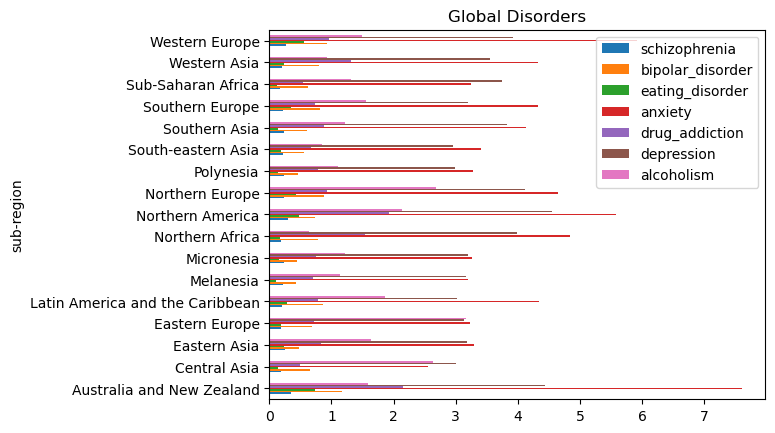

In [0]:
high_vs_low_development = depression.groupby(['sub-region'])[['schizophrenia','bipolar_disorder','eating_disorder','anxiety','drug_addiction','depression','alcoholism']].mean()
high_vs_low_development.plot(title='Global Disorders', xlabel='sub-region', kind='barh')

Como podemos observar en la gráfica, los desórdenes mentales más predominantes en todas las subregiones del mundo son la <code>ansiedad</code> y la <code>depresión</code>. Estos afectan casi de igual forma a todas las subregiones, sin importar el nivel socioeconomico. 

### ¿Qué tendencia tienen en su prevalencia a lo largo de los años?

La forma más sencilla de observar la evolución de los desórdenes es mediante una línea de tiempo, la cual muestre la evolución del valor promedio de cada uno a nivel global.

Este proceso se realiza mediante las funciones <code>groupby</code>, <code>mean</code> y <code>plot</code>.

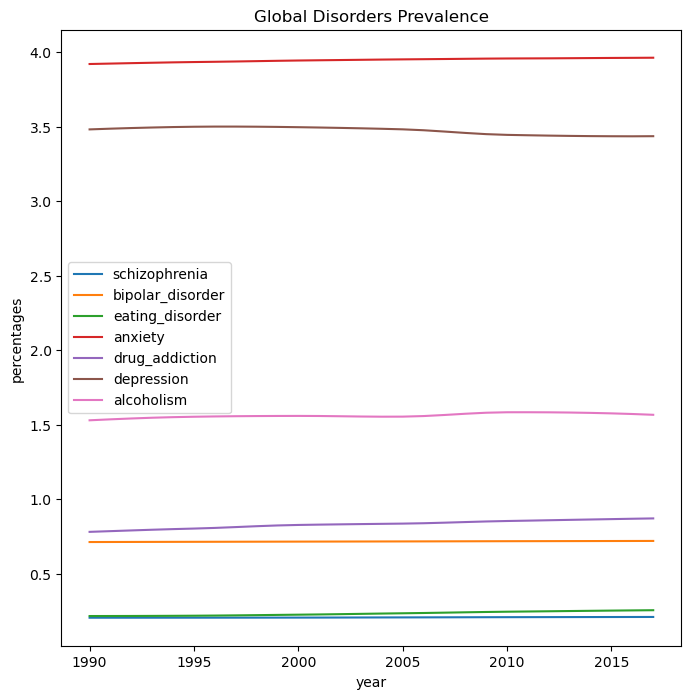

In [0]:
disorders_by_year = depression.groupby(['year'])[['schizophrenia','bipolar_disorder','eating_disorder','anxiety','drug_addiction','depression','alcoholism']].mean()
disorders_by_year.plot(title='Global Disorders Prevalence', xlabel='year', ylabel='percentages', figsize=(8, 8))

Como podemos observar en la gráfica, los desórdenes mentales son casi constantes. Estos han afectado al mundo y lo seguiran haciendo en los próximos años.

### ¿Está relacionada la depresión con el suicidio?

Para contestar esta interrogante, procedemos a obtener los promedios de las tasas de depresión y suicidio por cada 100,000 habitantes, agrupando este valor a lo largo de los años por país. Con estos valores procedemos a observar que correlación existe entre estas variables.

Este proceso se realiza mediante las funciones <code>groupby</code>, <code>mean</code>, <code>plot</code> y <code>max</code>.

           suicide_rate  depression_rate
entity                                  
Greenland          74.0           5954.0
Max population in Greenland: 57000.0


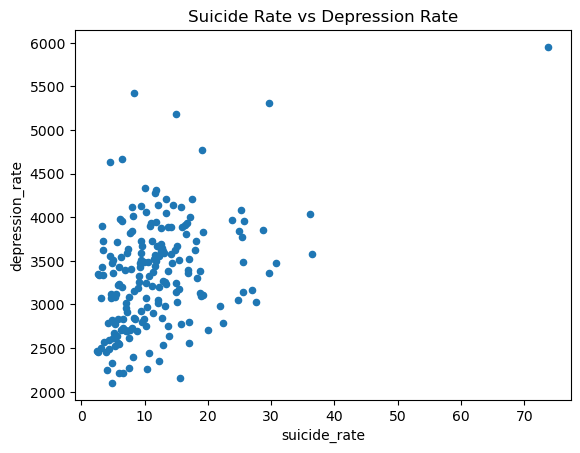

In [0]:
suicide_and_depression_rates = depression.groupby(['entity'])[['suicide_rate','depression_rate']].mean()
suicide_and_depression_rates.plot(title='Suicide Rate vs Depression Rate', x='suicide_rate', y='depression_rate', kind='scatter')

# Outlier
print(round(suicide_and_depression_rates[suicide_and_depression_rates['suicide_rate'] == suicide_and_depression_rates['suicide_rate'].max()]))
greenland_max_population = depression[depression['entity'] == 'Greenland'].groupby(['entity'])['population'].max()['Greenland']
print(f'Max population in Greenland: {greenland_max_population}')

En la gráfica anterior es posible observar una correlación positiva entre estos dos valores, aunque aun sería necesario realizar un análisis de los factores que influyen esta correlación para entender mejor su comportamiento. 

Otro punto de interés es el valor outlier, el cual  es <code>Groenlandia</code>, con tasas que exceden el doble usual. Esto se podría explicar en parte al hecho de que <code>Groenlandia</code> cuenta con una población sumamente pequeña, lo cual magnifica los efectos de sus tasas, o quizá el hecho que este país es sumamente frío y aislado contribuya a esto.

### ¿Qué género tiene mayor riesgo de padecer depresión?

Para analizar esta pregunta, podemos obtener el promedio mundial a lo largo de los años de las columnas de prevalencia, tanto en hombre como en mujeres, y observar los resultados.

Este proceso se realiza mediante las funciones <code>agg</code> y <code>mean</code>.

In [0]:
round(depression[['prevalence_in_males','prevalence_in_females']].agg(['mean']), 3)

,prevalence_in_males,prevalence_in_females
mean,2.796,4.123


Como podemos observar, la prevalencia de la depresión en <code>mujeres</code> es considerablemente mayor que en <code>hombres</code> a nivel mundial.

Un estudio interesante para complementar esta pregunta sería comparar prevalencia de suicidios, ya que la literatura indica que la tendencia encontrada en depresión es al revés al hablar de suicidios, sin embargo, no contamos con datos de suicidios separados por género.

Una nota sobre lo anterior, al indagar en el tema encontramos que, en promedio, las mujeres suelen intentar cometer suicidio más a menudo que los hombres, sin embargo, más hombres mueren por suicidio que mujeres. La explicación a este fenómeno suele ser que los hombres suelen utilizar métodos más efectivos que las mujeres.

### ¿Cuál es la situación de México en comparación al resto del mundo?

Nuestro querido <code>México</code> es parte de la subregión de <code>América Latina y el Caribe</code>, considerando los análisis anteriores, podemos decir que <code>México</code> se ve afectado por la <code>Ansiedad</code> y <code>Depresión</code> en igual medida que los demás países.

Para corroborar dicha suposición, realizaremos un análisis estadístico únicamente para <code>México</code>.

In [0]:
world_depression_disorders = pd.DataFrame(depression[depression['entity'] != 'Mexico'].groupby('year')[['schizophrenia','bipolar_disorder','eating_disorder','anxiety','drug_addiction','depression','alcoholism']].mean().mean()).T.rename(index={0: 'World'})
mexico_depression_disorders = pd.DataFrame(depression[depression['entity'] == 'Mexico'].groupby('year')[['schizophrenia','bipolar_disorder','eating_disorder','anxiety','drug_addiction','depression','alcoholism']].mean().mean()).T.rename(index={0: 'Mexico'})
round(pd.concat([world_depression_disorders, mexico_depression_disorders]), 3)

,schizophrenia,bipolar_disorder,eating_disorder,anxiety,drug_addiction,depression,alcoholism
World,0.208,0.717,0.234,3.952,0.833,3.478,1.562
Mexico,0.209,0.812,0.303,3.092,0.788,2.748,1.708


Como podemos observar, la población de <code>México</code> sufre de menor <code>Ansiedad</code>, <code>Drogadicción</code> y <code>Depresión</code> a comparación del resto del mundo.

In [0]:
world_depression_rates = pd.DataFrame(depression[depression['entity'] != 'Mexico'].groupby('year')[['depression_rate', 'suicide_rate']].mean().mean()).T.rename(index={0: 'World'})
mexico_depression_rates = pd.DataFrame(depression[depression['entity'] == 'Mexico'].groupby('year')[['depression_rate', 'suicide_rate']].mean().mean()).T.rename(index={0: 'Mexico'})
round(pd.concat([world_depression_rates, mexico_depression_rates]))

,depression_rate,suicide_rate
World,3336.0,12.0
Mexico,2610.0,5.0


<code>México</code> está por debajo de la media mundial en términos de casos de depresión y casos de suicidio, apesar de ésto, es importante destacar que es una situación delicada que hay que tratar.

In [0]:
mexico_depression_disorders_rating = pd.DataFrame(depression[depression['entity'] == 'Mexico'])[['year','schizophrenia','bipolar_disorder','eating_disorder','anxiety','drug_addiction','depression','alcoholism']].set_index('year')
mexico_depression_disorders_rating.plot(title='Mexico Disorders', xlabel='year', ylabel='percentages')

<AxesSubplot:title={'center':'Mexico Disorders'}, xlabel='year', ylabel='percentages'>

Al igual que en la gráfica global, podemos observar que no existen cambios especialemente drásticos en los desórdenes. Sin embargo, un fenómeno interesante en el país es la alza en los casos de ansiedad a partir del inicio del milenio, así como un ligero declive en los índices de alcoholismo al inicio de los noventas.

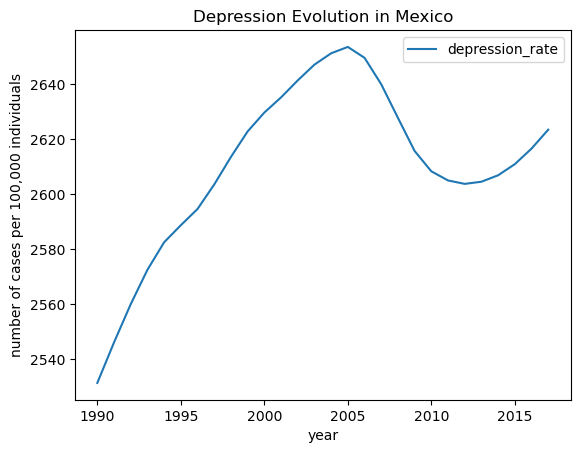

In [0]:
mexico_depression_depression_evolution = pd.DataFrame(depression[depression['entity'] == 'Mexico'])[['year', 'depression_rate']].set_index('year')
mexico_depression_depression_evolution.plot(title='Depression Evolution in Mexico', xlabel='year', ylabel='number of cases per 100,000 individuals')

Como podemos observar, los casos de depresión han aumentado considerablemente en México a lo largo de los años, esto es un riesgo ya que muchos casos de depresión terminan en suicidio.

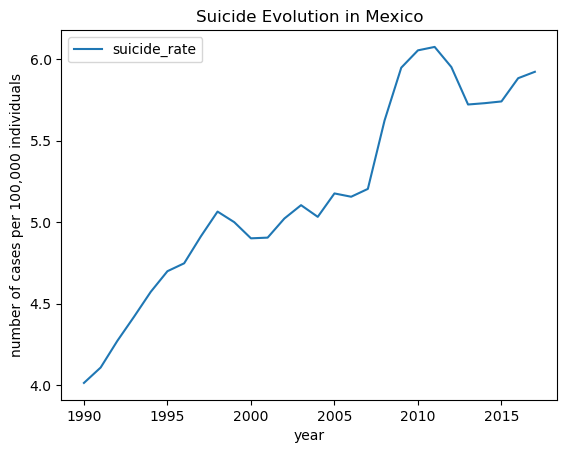

In [0]:
mexico_suicide_evolution = pd.DataFrame(depression[depression['entity'] == 'Mexico'])[['year', 'suicide_rate']].set_index('year')
mexico_suicide_evolution.plot(title='Suicide Evolution in Mexico', xlabel='year', ylabel='number of cases per 100,000 individuals')

Como podemos observar, los casos de suicidio han aumentado considerablemente en México a lo largo de los años, lo que supone un problema ya que ésto se debe a la depresión.

## Planes futuros

Una vez terminado el procesamiento y análisis inicial de nuestro dataset, es hora de preguntarnos sobre que rumbo deseamos llevar este proyecto.

- **Recolectar información de HAM-D (Hamilton Depression Rating Scale)**.- Recolectar esta información nos permitirá desarrollar un modelo que sea capaz de identificar de forma temprana comportamientos que sean clara señal de suicidio. Este modelo podría ser la diferencia entre la vida y la muerte de una persona que quizá no sabe que padece de depresión.

- **Hacer lineas de tiempo sobre la evolución a lo largo de años.**.- Utilizando librerias de gráficos más sofisticados, se planea realizar un análisis más extenso de la evolución de las distintas estadísticas con las que contamos a lo largo de los años, agrupando en base a diversas regiones o quizá a periodos específicos de tiempo.

- **Agregar información adicional de los países**.- Haciendo uso de la lista con códigos estándar de 3 dígitos de países, podemos adjuntar a nuestro dataset más información de manera sumamente sencilla. Esta información podría ser de carácter económico o social (tal como PIB o IDH) y nos serviría para entender de manera mejor las diferencias entre los diferentes países.

- **Investigar las causas de la evolución de las tasas de depresión y suicidio en México**.- Una vez que observamos la evolución de estas tasas en el país, no nos queda del todo claro el porque la tasa de depresión tuvó su pico alrederor del año 2006, mientras que la de suicidio lo tuvó alrederor de 2013. Sería interesante y de suma importancia entender los motivos por los que se presentaron estas alzas durante aquellos años. 

## Referencias 📚

- Dataset original: https://data.world/vizzup/mental-health-depression-disorder-data
- Dataset complementario de regiones: https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region

- Schimelpfening, N. (2020). Differences in Suicide Among Men and Women. https://www.verywellmind.com/gender-differences-in-suicide-methods-1067508. March 14, 2021.

- George, J. (2009). The Suicide Capital of the World, why do so many Greenlanders kill themselves? https://slate.com/news-and-politics/2009/10/why-do-so-many-greenlanders-kill-themselves.html. March 14, 2021.

- Farrel, H. M. (2015). What is depression? https://www.youtube.com/watch?v=z-IR48Mb3W0. March 14, 2021.

- Purriños, M. J. Escala de Hamilton ~ Hamilton Depresion Rating Scale (HDRS).https://meiga.info/escalas/depresion-escala-hamilton.PDF. March 14, 2021.

- Ritchie H., et al. Suicide. https://ourworldindata.org/suicide. March 14, 2021.